In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import colorcet as cc
import matplotlib.pyplot as plt
from toolz import concat
from pathlib import Path
from sklearn.pipeline import make_pipeline
from aging.plotting import format_plots, figure
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit, StratifiedKFold, LeaveOneGroupOut, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler, PowerTransformer, QuantileTransformer, SplineTransformer

In [2]:
format_plots()

In [3]:
version = 7
folder = Path(f'/n/groups/datta/win/longtogeny/data/ontogeny/version_{version:02d}')

In [4]:
df = pd.read_parquet(folder / "longtogeny_males_clean_v2.parquet")

In [5]:
df.head()

relabeled_syllables                                                                         0   \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.067047   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.084256   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.082147   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.106241   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.089604   

relabeled_syllables                                                                         1   \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.006657   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.009148   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.014786   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.013816   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.002970   

relabeled_syllables                                                                         2   \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.006182   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.004815   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.010405   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.003811   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.003465   

relabeled_syllables                                                                         3   \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.000476   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.001926   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.000548   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.000000   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.000000   

relabeled_syllables                                                                         4   \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.010461   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.009629   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.018620   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30 15:32:55  0.008099   
    02_02 02   567a1f13-cc44-478d-9547-bbe13f304592 02_02_021    2021-03-30 15:33:04  0.011386   

relabeled_syllables                                                                         5   \
age mouse cage uuid                                 subject_name date                            
21  01_01 01   2c031642-6e7a-4b1a-8b0c-eaa2f28ef089 01_01_021    2021-03-30 14:49:21  0.010461   
    01_02 01   181340b6-6c1d-4528-8920-2102d75d5711 01_02_021    2021-03-30 14:52:48  0.014925   
    01_04 01   b9459d2b-2357-427a-ad23-1b447a7621ea 01_04_021    2021-03-30 14:50:47  0.013691   
    02_01 02   b1884a07-9d38-44e7-916b-b2d6b4e0b985 02_01_021    2021-03-30

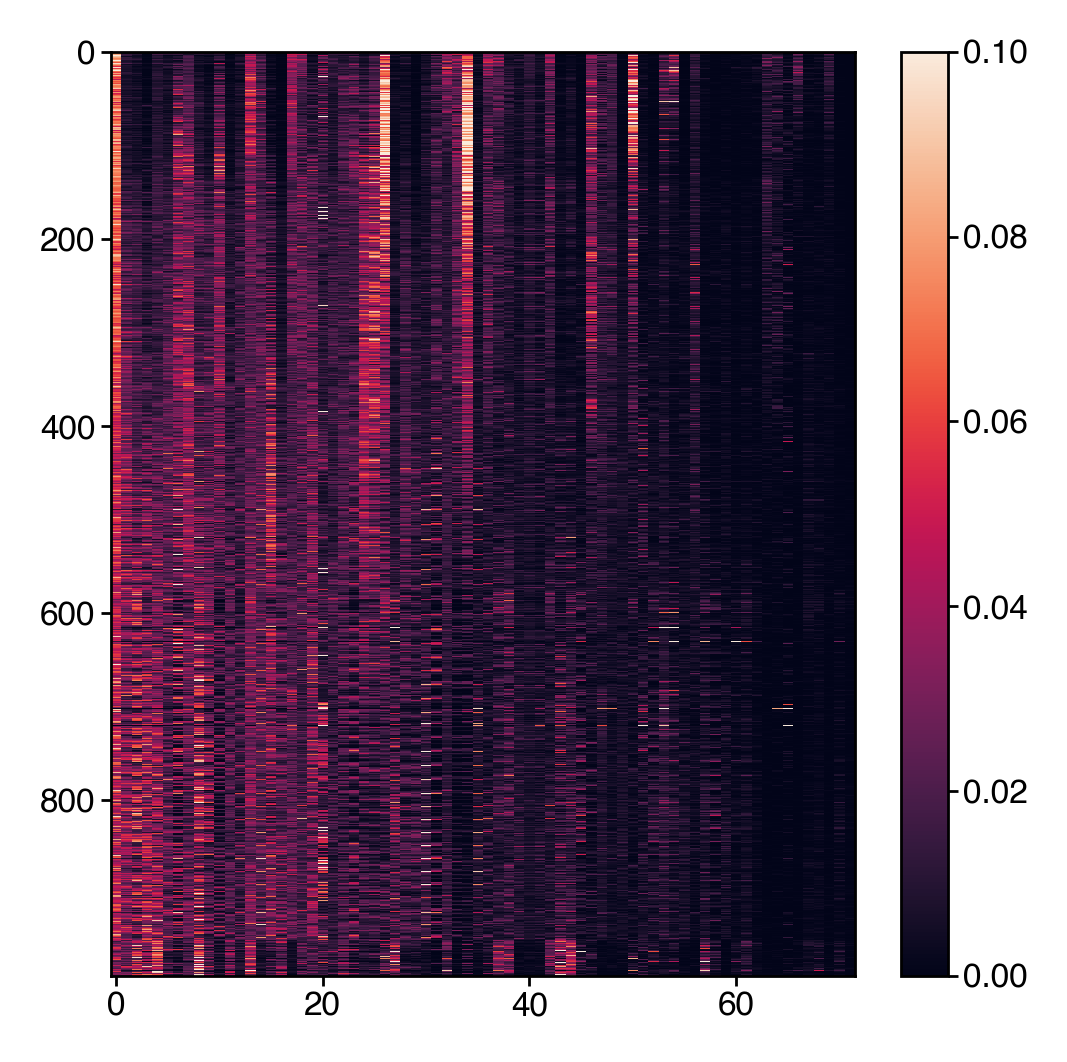

In [6]:
plt.imshow(df, vmax=0.1, aspect='auto', interpolation='none')
plt.colorbar()

In [7]:
# import ontogeny to get pseudotime
ont_df = pd.read_parquet(folder / "ontogeny_males_clean_pseudotime_resampled_v02.parquet")

In [8]:
count_map = ont_df.groupby('age')['0'].count()
count_map

age
3     16
5     16
7     16
9     16
12    16
16    16
20    16
24    16
28    16
32    16
35    16
36    16
52    16
56    16
72    16
78    16
80    15
84    16
90    16
Name: 0, dtype: int64

In [9]:
ages = list(concat([i] * n for i, n in count_map.items()))

In [10]:
ont_sort = ont_df.sort_values(by='pseudotime_rank')
ont_sort['pseudo_age'] = ages

In [11]:
x = ont_sort.iloc[:, :-3]
x = x.join(np.log2(x + 1e-6).add_prefix("log_"))

In [12]:
out = []
for i in range(1, 15):
    # pipeline = make_pipeline(PolynomialFeatures(), RobustScaler(), PLSRegression(n_components=i))
    # pipeline = make_pipeline(SplineTransformer(n_knots=4, degree=3), RobustScaler(), PLSRegression(n_components=i))
    # pipeline = make_pipeline(QuantileTransformer(n_quantiles=50), PLSRegression(n_components=i))
    # pipeline = make_pipeline(RobustScaler(), PLSRegression(n_components=i))
    pipeline = make_pipeline(
        RobustScaler(), KNeighborsRegressor(n_neighbors=i, metric="cosine")
    )

    age_hat = cross_val_predict(
        pipeline,
        x,
        y=ont_sort["pseudo_age"],
        # cv=ShuffleSplit(n_splits=50, test_size=0.33),
        groups=ont_sort["pseudo_age"],
        cv=LeaveOneGroupOut(),
        n_jobs=-1,
    )
    out.append(r2_score(ont_sort["pseudo_age"], age_hat.squeeze()))
    print(out[-1])

0.7662641673766882
0.8299344075263619
0.8495961460751291
0.8583289834867114
0.8542005497239912
0.8609853693557142
0.860101909309112
0.8589599201001488
0.8652004474634264
0.8621608540028698
0.8617004571179631
0.8601864610980599
0.8628780102480704
0.8612507871188309


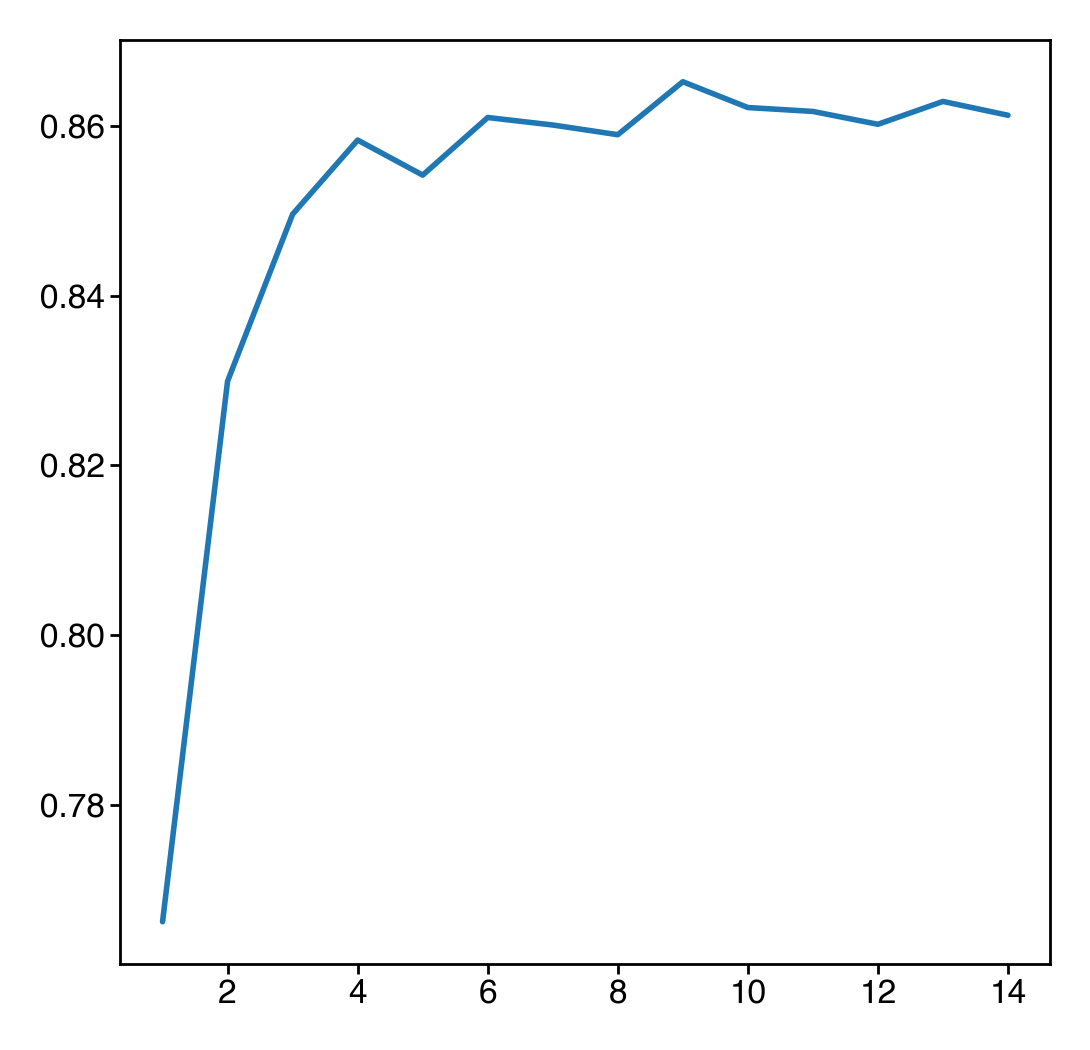

In [13]:
plt.plot(range(1, 15), out)

## KNN regressor

In [14]:
pipeline = make_pipeline(RobustScaler(), KNeighborsRegressor(n_neighbors=6, metric='cosine'))
pipeline = pipeline.fit(ont_sort.iloc[:, :-3], y=ont_sort["pseudo_age"])

In [15]:
psd = pipeline.predict(df.reindex(columns=list(map(int, ont_sort.columns[:-3]))).fillna(0))
psd_df = pd.Series(psd, index=df.index, name='pseudoage').reset_index()
psd_df['age'] /= 7

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [16]:
psd_df.head()

,age,mouse,cage,uuid,subject_name,date,pseudoage
0,3.0,01_01,01,2c031642-6e7a-4b1a-8b0c-eaa2f28ef089,01_01_021,2021-03-30 14:49:21,3.000000
1,3.0,01_02,01,181340b6-6c1d-4528-8920-2102d75d5711,01_02_021,2021-03-30 14:52:48,14.833333
2,3.0,01_04,01,b9459d2b-2357-427a-ad23-1b447a7621ea,01_04_021,2021-03-30 14:50:47,4.666667
3,3.0,02_01,02,b1884a07-9d38-44e7-916b-b2d6b4e0b985,02_01_021,2021-03-30 15:32:55,3.000000
4,3.0,02_02,02,567a1f13-cc44-478d-9547-bbe13f304592,02_02_021,2021-03-30 15:33:04,3.000000


In [17]:
avgs = psd_df.groupby(['mouse', 'cage'])['pseudoage'].transform(lambda v: v.rolling(5, center=True).mean())
psd_df['pseudo_smooth'] = avgs

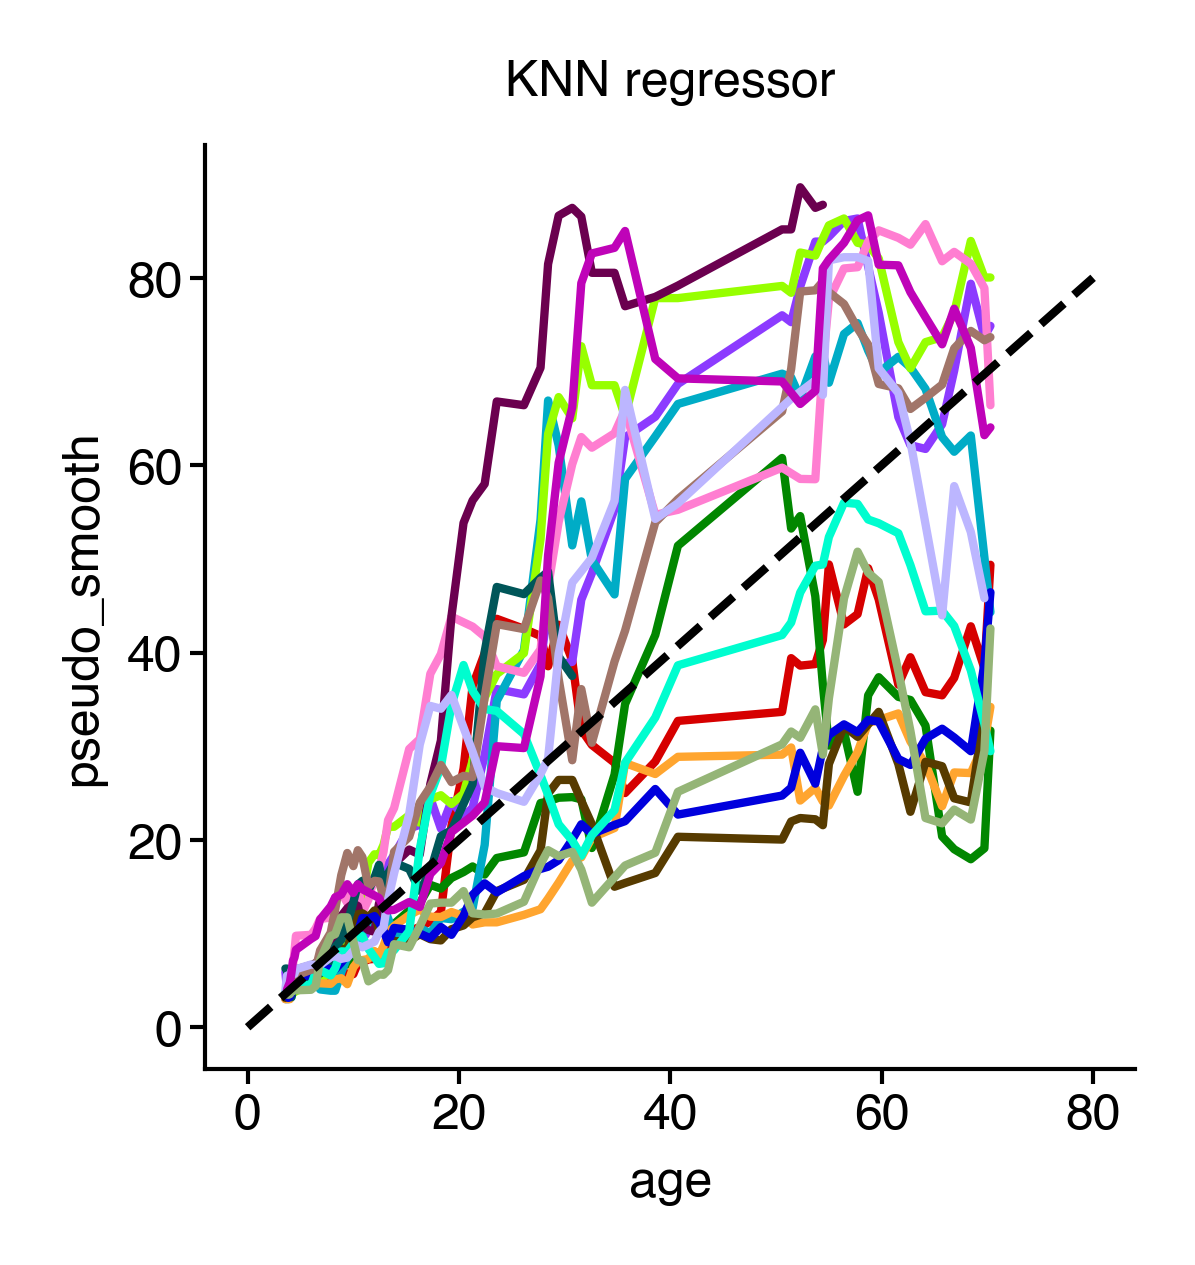

In [22]:
fig = figure(2, 2)
ax = sns.lineplot(
    data=psd_df.query("age < 90"),
    x="age",
    y="pseudo_smooth",
    hue="mouse",
    palette=cc.glasbey[:16],
    legend=False,
)
ax.plot([0, 80], [0, 80], color="k", ls="--")
ax.set(title='KNN regressor')
sns.despine()

In [19]:
df['pseudo_age'] = psd

In [20]:
df.to_parquet(folder / "longtogeny_males_clean_pseudotime_v2.parquet")

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/pandas/io/parquet.py:189: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


## PLS regressor

In [82]:
# pipeline = make_pipeline(RobustScaler(), PolynomialFeatures(interaction_only=True), PLSRegression(n_components=6))
pipeline = make_pipeline(SplineTransformer(n_knots=4, degree=2), RobustScaler(), PLSRegression(n_components=i))
# pipeline = make_pipeline(RobustScaler(), PLSRegression(n_components=2))
pipeline = pipeline.fit(ont_sort.iloc[:, :-3], y=ont_sort["pseudo_age"])

In [83]:
psd = pipeline.predict(df.reindex(columns=list(map(int, ont_sort.columns[:-3]))).fillna(0))
psd_df = pd.Series(psd, index=df.index, name='pseudoage').reset_index()
psd_df['age'] /= 7

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


In [84]:
psd_df.head()

,age,mouse,cage,uuid,subject_name,date,pseudoage
0,3.0,01_01,01,2c031642-6e7a-4b1a-8b0c-eaa2f28ef089,01_01_021,2021-03-30 14:49:21,-0.064068
1,3.0,01_02,01,181340b6-6c1d-4528-8920-2102d75d5711,01_02_021,2021-03-30 14:52:48,26.280232
2,3.0,01_04,01,b9459d2b-2357-427a-ad23-1b447a7621ea,01_04_021,2021-03-30 14:50:47,2.712703
3,3.0,02_01,02,b1884a07-9d38-44e7-916b-b2d6b4e0b985,02_01_021,2021-03-30 15:32:55,22.501842
4,3.0,02_02,02,567a1f13-cc44-478d-9547-bbe13f304592,02_02_021,2021-03-30 15:33:04,15.174019


In [85]:
avgs = psd_df.groupby(['mouse', 'cage'])['pseudoage'].transform(lambda v: v.rolling(5, center=True).mean())
psd_df['pseudo_smooth'] = avgs

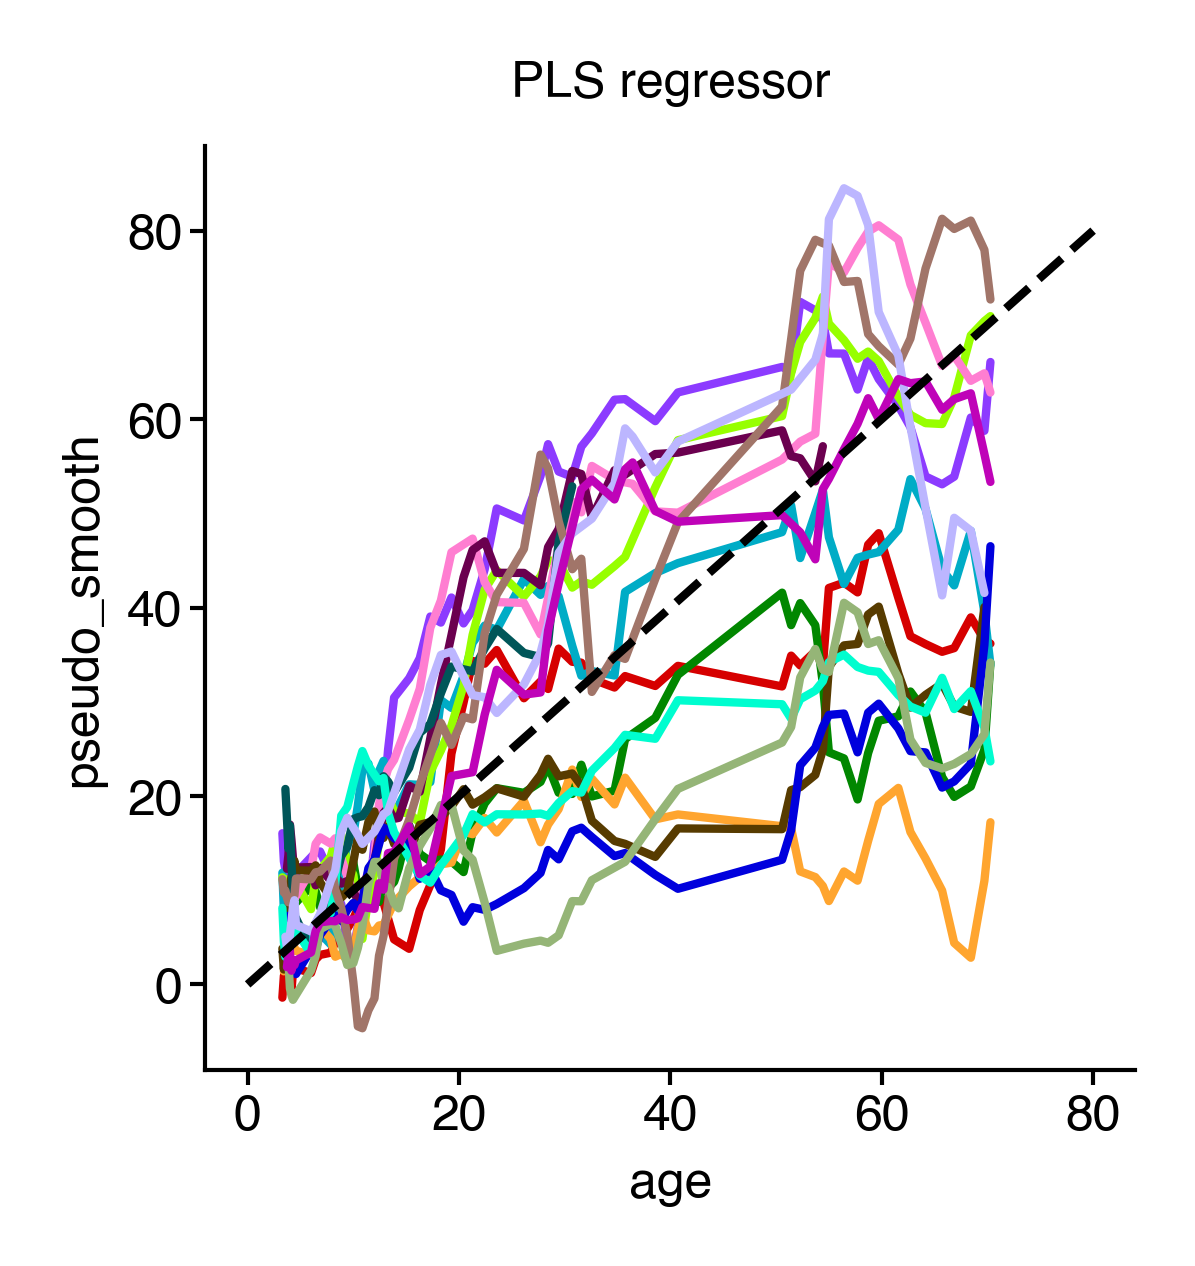

In [86]:
fig = figure(2, 2)
ax = sns.lineplot(
    # data=psd_df,
    data=psd_df.query('age < 90'),
    x="age",
    y="pseudo_smooth",
    hue="mouse",
    palette=cc.glasbey[:16],
    legend=False,
)
ax.plot([0, 80], [0, 80], color="k", ls="--")
ax.set(title='PLS regressor')
sns.despine()